# Week 3 

## SPARQL: Protocol and RDF Query Language
Specification: https://www.w3.org/TR/sparql11-query/

* 3.1 How to Query RDF(S)
    * Excursion 2: DBpedia Knowledge Graph https://dbpedia.org/snorql/
    * Excursion 3: Wikidata Knowledge Graph https://query.wikidata.org/
* 3.2 Complex Queries with SPARQL
* 3.3 More Complex SPARQL Queries
* 3.4 SPARQL Subqueries and Property Paths
* 3.5 RDF Databases
* 3.6 SPARQL is more than a Query Language

In [148]:
from IPython.display import Image
import urllib
import pandas as pd
import networkx as nx
from graphviz import Digraph
import matplotlib.pyplot as plt
%matplotlib inline

# Preliminaries

## Semantic Web Tools
Jena and Protege are probably the best known, but there are also others:
* https://www.w3.org/wiki/SemanticWebTools#Python_Developers
* https://www.w3.org/2001/sw/wiki/ToolTable

## Graphing tools
Sometimes it helps to visualize the graph. The rdf-grapher service does just that.

https://www.ldf.fi/service/rdf-grapher
    
Usage:   
`http://www.ldf.fi/service/rdf-grapher?rdf=DATA_OR_URI&from=FORMAT&to=FORMAT`

GET/POST parameters:

* rdf	RDF data or URI
* from	input serialization format (ttl, xml, json, nt, trig, nq), default: ttl
* to	output image format (png, svg, pdf, ps, eps, gif, jpg), default: png

Example:   
`http://www.ldf.fi/service/rdf-grapher?rdf=<http://example.com/s>+<http://example.com/p>+<http://example.com/o>+.&from=ttl&to=png`
<img src="https://www.ldf.fi/service/rdf-grapher?rdf=%3Chttp://example.com/s%3E+%3Chttp://example.com/p%3E+%3Chttp://example.com/o%3E+.&from=ttl&to=png">

### Programatic example:

In [21]:
# 3.2 Complex SPARQL Queries Question 1
# url encode the rdf string which will be passed to the query parameter 'rdf'
rdf_string=urllib.parse.quote_plus("""
@prefix schema: <https://schema.org/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix ex: <https://example.org/resource/> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:SpaceForce ex:network dbr:Netflix ;
    schema:genre ex:Space ;
    schema:actor dbr:Steve_Carell,
        dbr:John_Malkovich ;
    schema:datePublished "2020-05-29"^^xsd:date ;
    rdfs:label "Space Force"@en .
ex:The_Office_US schema:genre dbr:Mockumentary ;
    schema:actor dbr:Steve_Carell ,
        dbr:John_Krasinski ;
    ex:episodes "201" ;
    schema:datePublished "2005-03-24"^^xsd:date ;
    rdfs:label "Das Büro"@de ,
        "The Office"@en .
dbr:Westworld ex:network dbr:HBO ;
    schema:genre dbr:Western ;
    ex:episodes "28" ;
    schema:datePublished "2016-10-02"^^xsd:date ;
    schema:isBasedOn dbr:Westworld_\(film\) .
ex:Star_Trek:Picard ex:network ex:CBS ;
    schema:genre ex:Space ;
    ex:episodes "10" ;
    schema:datePublished "2020-03-23"^^xsd:date .
dbr:Bird_Box_\(film\) schema:actor dbr:John_Malkovich ;
    schema:datePublished "2018-11-12"^^xsd:date .
""")

In [69]:
Image(url='http://www.ldf.fi/service/rdf-grapher?rdf='+rdf_string+'&from=ttl&to=png') 

## Query Dbpedia and visualize result
https://dbpedia.org/snorql/

In [143]:
sparql_string=urllib.parse.quote_plus("""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dbo: <http://dbpedia.org/ontology/>
SELECT ?author ?work
WHERE {
?author rdf:type dbo:Writer ;
dbo:notableWork ?work .
} LIMIT 10
""")

In [144]:
!curl -L -H "Accept: text/html" --request GET "http://dbpedia.org/sparql?default-graph-uri=http://dbpedia.org&query={sparql_string}" > resultTable.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   153  100   153    0     0   3825      0 --:--:-- --:--:-- --:--:--  3825
100  2545  100  2545    0     0  19427      0 --:--:-- --:--:-- --:--:-- 19427


In [145]:
# because everything is easier with Pandas:
table=pd.read_html('resultTable.html')[0]
table.head()
# auth = table.iloc(0)[0]['author'].split('/')[-1].replace('_',' ')
# work = table.iloc(0)[0]['work'].split('/')[-1].replace('_',' ')
# print(auth)
# print(work)

,author,work
0,http://dbpedia.org/resource/A._J._Healy,http://dbpedia.org/resource/Tommy_Storm_and_th...
1,http://dbpedia.org/resource/A._J._Healy,http://dbpedia.org/resource/Tommy_Storm
2,http://dbpedia.org/resource/A._S._PatriÄ,http://dbpedia.org/resource/Black_Rock_White_City
3,http://dbpedia.org/resource/Lowell_Cunningham,http://dbpedia.org/resource/The_Men_in_Black_(...
4,http://dbpedia.org/resource/Lu_Xun,http://dbpedia.org/resource/Kong_Yiji


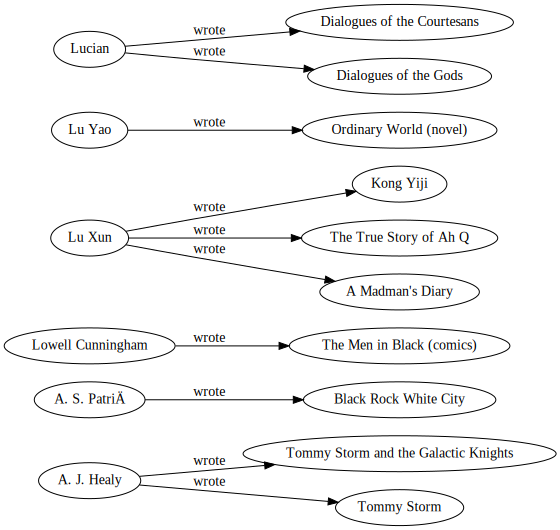

In [146]:
g = Digraph()
g.graph_attr['rankdir'] = 'LR'
g.attr('node', shape='oval')

for row in table.iterrows():
    author = row[1][0].split('/')[-1].replace('_',' ')
    work   = row[1][1].split('/')[-1].replace('_',' ')
    g.node(author)
    g.node(work)
    g.edge(author, work, label="wrote")

g

## Query Wikidata and visualize result
https://query.wikidata.org/

## Some tutorials
* https://medium.com/agnos-ai/exploring-a-rdf-graph-database-ba2688f9e118
* https://medium.com/agnos-ai/northwind-sql-vs-sparql-de662f2e0e7b
* https://medium.com/agnos-ai/working-with-rdf-database-named-graphs-a5ddab447e91

# EDA - dbpedia
Exploratory Data Ananlysis on dbpedia

### EDA 3.1 
Write a SPARQL query to count the total number of triples in dbpedia

In [161]:
sparql_string=urllib.parse.quote_plus("""
SELECT (COUNT(?s) as ?numTriples)
WHERE {
    ?s ?p ?o .
}
""")
!echo | curl -L -H "Accept: text/html" --request GET "http://dbpedia.org/sparql?default-graph-uri=http://dbpedia.org&query={sparql_string}"

<table class="sparql" border="1">
  <tr>
    <th>numTriples</th>
  </tr>
  <tr>
    <td><pre>859801816</pre></td>
  </tr>
</table>

### EDA 3.2
Write a SPARQL query to count the number of unique properties in dbpedia

In [246]:
sparql_string=urllib.parse.quote_plus("""
SELECT count(distinct ?p) as ?pc
WHERE{?s ?p ?o}
""")
!echo | curl -L -H "Accept: text/html" --request GET "http://dbpedia.org/sparql?default-graph-uri=http://dbpedia.org&query={sparql_string}"

<table class="sparql" border="1">
  <tr>
    <th>pc</th>
  </tr>
  <tr>
    <td><pre>54155</pre></td>
  </tr>
</table>

### EDA 3.3
Write a SPARQL query to fetch all the properties in the `<http://dbpedia.org/property/>` namespace

In [240]:
sparql_string=urllib.parse.quote_plus("""
PREFIX rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbo:  <http://dbpedia.org/ontology/>
PREFIX dbpp:  <http://dbpedia.org/property/>

SELECT count(?predicate) as ?pc ?predicate
    WHERE {
    ?subject ?predicate ?object
    FILTER CONTAINS(str(?predicate),"http://dbpedia.org/property/")
    } 
ORDER BY desc(?pc)
""")
!curl -L -H "Accept: text/html" --request GET "http://dbpedia.org/sparql?default-graph-uri=http://dbpedia.org&query={sparql_string}" > distinct_predicates_2.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   153  100   153    0     0   3558      0 --:--:-- --:--:-- --:--:--  3558
100   167    0   167    0     0      0      0 --:--:--  0:20:00 --:--:--    39:--:--  0:00:14 --:--:--     0--     048 --:--:--     0   0 --:--:--  0:08:34 --:--:--     0--     0--     0    0     0    0     0      0      0 --:--:--  0:09:42 --:--:--     07 --:--:--     032 --:--:--     0   0     0      0      0 --:--:--  0:11:29 --:--:--     0   0      0      0 --:--:--  0:12:22 --:--:--     0 --:--:--  0:13:46 --:--:--     00:13:53 --:--:--     0--  0:14:14 --:--:--     0   0      0 --:--:--  0:14:53 --:--:--     0   0 --:--:--  0:15:55 --:--:--     016:22 --:--:--     00 --:--:--  0:16:53 --:--:--     017:33 --:--:--     019:15 --:--:--     0


In [243]:
# table=pd.read_html('distinct_predicates_2.html')[0]
# print(len(table))
# table

In [245]:
!cat distinct_predicates_2.html

<html>
<head><title>504 Gateway Time-out</title></head>
<body>
<center><h1>504 Gateway Time-out</h1></center>
<hr><center>nginx/1.18.0</center>
</body>
</html>


# Exercises

## 3.1
* variables, e.g. `?title, ?author, ?date`
* SELECT statement, e.g. `SELECT ?title ?author ?date`
* Graph Pattern Matching, e.g. `?book dbo:author ?author`
* complex (conjunctive (and)) queries
* solution sequence modifiers `LIMIT OFFSET ORDER BY`
* filter constraints
* Unary Operator Constraints e.g. `FILTER (LANG(?author_name)="en").`

### Example:

```
PREFIX :     <http://dbpedia.org/resource/>
PREFIX rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbo:  <http://dbpedia.org/ontology/>

SELECT ?author_name ?title

FROM <http://dbpedia.org/>

WHERE {
?author rdf:type dbo:Writer .
?author rdfs:label ?author_name .
?author dbo:notableWork ?work .
        ?work rdfs:label ?title .
}
ORDER BY ASC (?author_name)
LIMIT 100
OFFSET 10
```

### Question 3.1.1
__Find all locations that have been named after George Washington using the dbpedia endpoint.__ An endpoint, also called a processor, is a service (although not necessarily a web service) that accepts and processes SPARQL queries and returns results

In [252]:
# George Washington's Namesakes
sparql_string=urllib.parse.quote_plus("""
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbo: <http://dbpedia.org/ontology/>
SELECT ?location
WHERE {
    ?location rdfs:label ?locLabel .
    FILTER REGEX (?locLabel,"George Washington","i") 
    FILTER (LANG(?locLabel)="en").
}

""")
!curl -L -H "Accept: text/html" --request GET "http://dbpedia.org/sparql?default-graph-uri=http://dbpedia.org&query={sparql_string}" > resultTable3.html
table=pd.read_html('resultTable3.html')[0]
table.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   153  100   153    0     0   3187      0 --:--:-- --:--:-- --:--:--  3187
100  176k  100  176k    0     0   1327      0  0:02:16  0:02:16 --:--:-- 5076243 --:--:--     0


,location
0,http://dbpedia.org/resource/Category:George_Wa...
1,http://dbpedia.org/resource/Category:George_Wa...
2,http://dbpedia.org/resource/Category:Presidenc...
3,http://dbpedia.org/resource/Category:Speeches_...
4,http://dbpedia.org/resource/1947_George_Washin...


### Notes on the solution
The above query is not what we want since it's actually returning all the resources with `George Washington` in the label. But in order to find precisely the answer to the question, we first have to know the property name `namedFor`. However, this still doesn't ensure that the ?location is in fact a `location` unless we assume that only objects of type location have the property `namedFor`. 

How one goes about learning the schema of a dataset as large as dbpedia is somewhat of a mystery to me still.

In [209]:
# George Washington's Namesakes
sparql_string=urllib.parse.quote_plus("""
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbpp: <http://dbpedia.org/property/>
SELECT ?location
WHERE {
    ?person rdfs:label "George Washington"@en .
    ?location dbpp:namedFor ?person
}

""")
!curl -L -H "Accept: text/html" --request GET "http://dbpedia.org/sparql?default-graph-uri=http://dbpedia.org&query={sparql_string}" > resultTable2.html
table=pd.read_html('resultTable2.html')[0]
table.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   153  100   153    0     0   3923      0 --:--:-- --:--:-- --:--:--  3923
100  7159  100  7159    0     0  50773      0 --:--:-- --:--:-- --:--:-- 50773


,location
0,"http://dbpedia.org/resource/Washington_County,..."
1,"http://dbpedia.org/resource/Washington_County,..."
2,"http://dbpedia.org/resource/Washington_County,..."
3,"http://dbpedia.org/resource/Washington_County,..."
4,"http://dbpedia.org/resource/Washington_County,..."


### Question 3.1.2
(Foundations of Semantic Web book ch7 exercises).  
__State the following as conjunctive queries.__    
Use the class names `Male`, `Female`, `Catholic`, and `Priest`   
and the role names `killed`, `childOf`, and `marriedWith`.   
1. all married couples which have a child together
2. all married female Catholic priests 
3. all persons whose parents are married 
4. all women who killed their husband 
5. all married couples both of whom committed suicide

## 3.2
* SERVICE wikibase:label
{ bd:serviceParam wikibase:language "en" }
* Operators
    * Logical connectives && (AND) and || (OR) for xsd:boolean
    * Comparison operators =, !=, <, >, <=, and >= for numeric datatypes,
    xsd:dateTime, xsd:string, and xsd:boolean
    * Comparison operators = and != for other datatypes
    * Arithmetic operators +, -, *, and / for numeric datatypes
    * REGEX(String,Pattern) or REGEX(String,Pattern,Flags) e.g. `FILTER REGEX (?bookLabel,"earth$","i") .`   
     *(The regular expression language is the same as the XQuery regular expression language which is codified version of that found in Perl)*   
    * sameTERM(A,B)
    * langMATCHES(A,B)
* OPTIONAL constraint
* UNION - logical disjunction (or)
* negation
    * FILTER NOT EXISTS
    * MINUS
    * !BOUND()

### Download Virtuoso
At core, Virtuoso is a high-performance object-relational SQL database. OpenLink Virtuoso supports SPARQL embedded into SQL for querying RDF data stored in Virtuoso's database. (I beliveve DBpedia runs on Virtuoso - must double check)   
* __DOWNLOAD:__ http://vos.openlinksw.com/owiki/wiki/VOS/VOSDownload
* __INSTRUCTIONS__ Slides For Setting up Virtuoso on Mac OSX: https://docs.google.com/presentation/d/1mWrCK_24Kw869ND60vIFRUUDzy3zx4x5xyQ9bTB0o1w/edit?usp=sharing
* __VIRTUOSO TUTORIAL:__ https://www.youtube.com/watch?v=A8gVp1Wjmso

You can now do the following exercises and check your results.

### Consider the Graph:

In [257]:
# week3/stars.ttl
stars_rdf=urllib.parse.quote_plus("""
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix ex: <http://www.example.com> .
ex:Sun ex:radius "1.392e6"^^xsd:double ; 
       ex:satellite ex:Mercury, ex:Venus, ex:Earth, ex:Mars .
ex:Mercury ex:radius "2439.7"^^xsd:double . 
ex:Venus ex:radius "6051.9"^^xsd:double . 
ex:Earth ex:radius "6372.8"^^xsd:double ; 
         ex:satellite ex:Moon .
ex:Mars ex:radius "3402.5"^^xsd:double ; 
        ex:name   "Mond@de", "Moon@en" ;
        ex:radius "1737.1"^^xsd:double . 
ex:Phobos ex:name "Phobos" .
ex:Deimos ex:name  "Deimos" .
""")  

In [258]:
Image(url='http://www.ldf.fi/service/rdf-grapher?rdf='+stars_rdf+'&from=ttl&to=png') 

### Question 3.2.1
(Foundations of Semantic Web book ch7 exercises).  
__Using the graph above, specify SPARQL queries which yield the following results in the form of a table.__
1. Objects which orbit around the sun or around a satellite of the sun.
2. Objects with a volume greater than 2 · 1010 (km3) together with the object – if it exists – of which they are a satellite. Assume for this that all celestial bodies are spherical.
3. Objects with a satellite for which an English name is given, and which furthermore are satellites of an object with diameter greater than 3000 (km).
4. Objects with two or more satellites. Assume for this that different URIs denote different objects.


### Question 3.2.2
__Formulate a query which asks for all celestial bodies which do not have
a satellite.__ Assume for this that the knowledge base from Exercise 7.1 has been completed with triples which assign to every celestial body the rdf:type CelestialBody.


## 3.3
* Fedarated queries SERVICE {}
* Variabe assignment e.g. `BIND (YEAR(?date) AS ?year) FILTER (BOUND(?year))`
* Aggragate functions
    * count
    * count(distinct())
    * SUM
    * AVG
    * MIN / MAX
    * SAMPLE
    * GROUP_CONCAT
* GROUP BY




## 3.4 
* Inner Subqueries - *Subqueries are a way to embed SPARQL queries within other queries. Result is achieved by first evaluating the inner query*

* Property paths
    * alternatives: match one or both possibilities      
        `{ :book1 dc:title|rdfs:label ?displayString . }`
    * sequence: property path of length >1      
        `{ :alice foaf:knows/foaf:knows/foaf:name ?name . }`
    * inverse property paths: reversing the direction of the triple     
        `{ ?x foaf:mbox <mailto:alice@example> . }`
         ` =`
        `{ <mailto:alice@example> ^foaf:mbox ?x . }`
    * inverse path sequences   
        `{ ?x foaf:knows/^foaf:knows ?y .  FILTER (?x != ?y) }`
    * arbitrary length match (+ one or more; * zero or more).  
        `{ :alice foaf:knows+/foaf:name ?name . }`
    * negated property paths   
        `{ ?x !(rdf:type|^rdf:type) ?y . }`
        

## 3.6
* ASK
* CONSTRUCT
* DESCRIBE

# Discussion

1. Think about what makes a SPARQL query difficult for a triple store to answer. Discuss what factors play into the difficulty in answering a query.
2. What are some of the difficulties in building queries on DBpedia?
3. What is the benefit of an ontology in building SPARQL queries?


It is difficult to write a query that lists all the items in a collection because there is no support for looping or variable-length lists. It is the experience of the authors that RDF collections are not used heavily in production environments.